# Visualização dos microdados das matriculas da rede municipal de educação do município de SP

In [253]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import plotly.express as px

In [254]:
anos = ['2020', '2019', '2018', '2017', '2016', '2015']
tam = 10000

for i, ano in enumerate(anos):
    if ano == '2020' or ano == '2019':
        tabela = pd.read_csv('data/Microdados_EOL_Matriculas_Ano_' + ano + '.csv', encoding = "ISO-8859-1", sep = ';')
        # tabela = pd.read_csv('data/Microdados_EOL_Matriculas_Ano_' + ano + '.csv', encoding = "ISO-8859-1", sep = ';', chunksize = tam)
    else:
        tabela = pd.read_csv('data/Microdados_EOL_Matriculas_Ano_' + ano + '.csv', encoding = "ISO-8859-1", sep = '|')
        # tabela = pd.read_csv('data/Microdados_EOL_Matriculas_Ano_' + ano + '.csv', encoding = "ISO-8859-1", sep = '|', chunksize = tam)

    # for chunk in tabela:
    #     y = pd.DataFrame(chunk)
    #     break
    
    y = pd.DataFrame(tabela)
    
    # Limpeza dados
    if 'CD_INEP_ALUNO' not in y.columns:
        y['CD_INEP_ALUNO'] = ''

    if 'Hora_Inicio' not in y.columns:
        y['Hora_Inicio'] = ''

    if 'DEF_AUTISMO' in y.columns:
        y = y.rename(columns={'DEF_AUTISMO': 'DEF__AUTISMO'})

    if 'DEF_SURDEZ_LEVE' in y.columns:
        y = y.rename(columns={'DEF_SURDEZ_LEVE': 'DEF__SURDEZ_LEVE'})

    if 'DEF_SURDEZ_SEV' in y.columns:
        y = y.rename(columns={'DEF_SURDEZ_SEV': 'DEF__SURDEZ_SEV'})

    if 'DEF_INTELECT' in y.columns:
        y = y.rename(columns={'DEF_INTELECT': 'DEF__INTELECT'})

    if 'DEF_MULTIPLA' in y.columns:
        y = y.rename(columns={'DEF_MULTIPLA': 'DEF__MULTIPLA'})

    if 'DEF_CEGUEIRA' in y.columns:
        y = y.rename(columns={'DEF_CEGUEIRA': 'DEF__CEGUEIRA'})

    if 'DEF_BAIXA_VISAO' in y.columns:
        y = y.rename(columns={'DEF_BAIXA_VISAO': 'DEF__BAIXA_VISAO'})

    if 'DEF_SURDO_CEG' in y.columns:
        y = y.rename(columns={'DEF_SURDO_CEG': 'DEF__SURDO_CEG'})

    if 'DEF_TRANST_DES_INF' in y.columns:
        y = y.rename(columns={'DEF_TRANST_DES_INF': 'DEF__TRANST_DES_INF'})

    if 'DEF_SINDR_ASPER' in y.columns:
        y = y.rename(columns={'DEF_SINDR_ASPER': 'DEF__SINDR_ASPER'})

    if 'DEF_SINDR_RETT' in y.columns:
        y = y.rename(columns={'DEF_SINDR_RETT': 'DEF__SINDR_RETT'})

    if 'DEF_FIS_N_CADEIR' in y.columns:
        y = y.rename(columns={'DEF_FIS_N_CADEIR': 'DEF__FIS_N_CADEIR'})

    if 'DEF_FIS_CADEIR' in y.columns:
        y = y.rename(columns={'DEF_FIS_CADEIR': 'DEF__FIS_CADEIR'})

    if 'DEF_N_POSSUI' in y.columns:
        y = y.rename(columns={'DEF_N_POSSUI': 'DEF__N_POSSUI'})

    labelsDeficiencia = ['NEE_ALT_HAB', 'DEF__AUTISMO', 'DEF__SURDEZ_LEVE', 'DEF__SURDEZ_SEV', 'DEF__INTELECT', 'DEF__MULTIPLA', 'DEF__CEGUEIRA', 'DEF__BAIXA_VISAO', 'DEF__SURDO_CEG', 'DEF__TRANST_DES_INF', 'DEF__SINDR_ASPER', 'DEF__SINDR_RETT', 'DEF__FIS_N_CADEIR', 'DEF__FIS_CADEIR', 'DEF__N_POSSUI']
    
    for label in labelsDeficiencia:
         y.loc[y[label] == '0,00', label] = 0
         y.loc[y[label] == '1,00', label] = 1

    y = y.drop(columns=['DESC_TIPO_PROGRAMA', 'CD_INEP_ALUNO', 'CD_PARECER_CONCL_FIN', 'DESC_PARECER_CONCL_FIN', 'DESC_TIPO_PROGRAMA', 'Hora_Inicio'])

    y.loc[y['DESC_CICLO_ENSINO'].isnull(), 'DESC_CICLO_ENSINO'] = 'NAO INFORMADO'

    y = y.drop_duplicates(subset='CD_ALUNO_SME')

    if i == 0:
        y.to_csv('data/Matriculas.csv', sep=';', index=False, line_terminator="")
    else:
        y.to_csv('data/Matriculas.csv', sep=';', mode='a', index=False, line_terminator="", header=False)

C:\ferramentass\Python3.9\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (23,25,29,96) have mixed types.Specify dtype option on import or set low_memory=False.

C:\ferramentass\Python3.9\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (20,22,24,28,95) have mixed types.Specify dtype option on import or set low_memory=False.

C:\ferramentass\Python3.9\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.



In [255]:
# tabela = pd.read_csv('data/Matriculas.csv', encoding = "ISO-8859-1", sep = ';', chunksize=tam)

# for data in tabela:
#     y = pd.DataFrame(data)
#     break

tabela = pd.read_csv('data/Matriculas.csv', encoding = "ISO-8859-1", sep = ';')
y = pd.DataFrame(tabela)

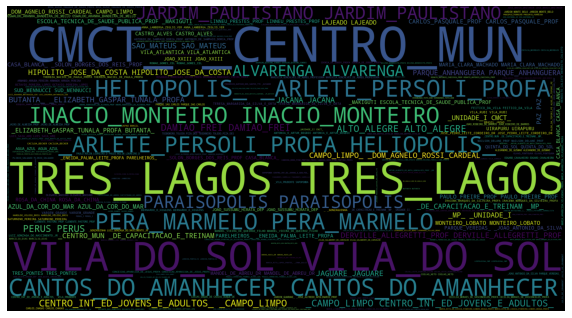

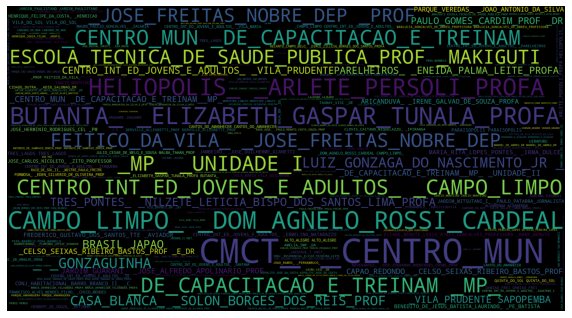

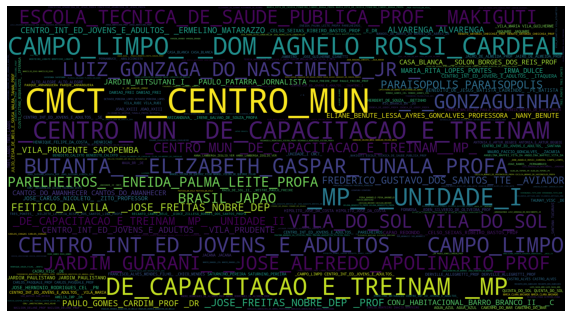

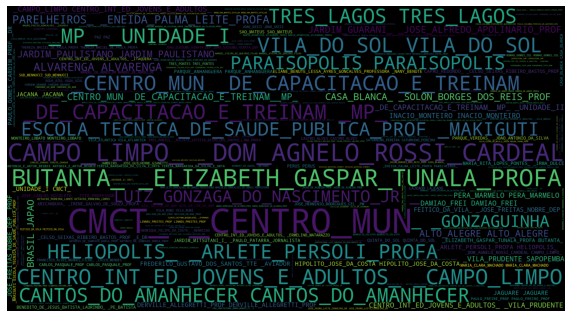

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def saveImage(text, ano):
    wordcloud = WordCloud(background_color="black", width=1980, height=1080).generate(text)

    fig, ax = plt.subplots(figsize=(10,6))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()

    plt.imshow(wordcloud)
    wordcloud.to_file('wordcloud_' + ano + '.png')

for ano in anos:
    saveImage(y.loc[y['AN_LETIVO'] == int(ano)]['NOME_ESCOLA'].str.replace(',', '').str.replace(' ', '_').str.cat(sep=' '), ano)
    
saveImage(y['NOME_ESCOLA'].str.replace(',', '').str.replace(' ', '_').str.cat(sep=' '), 'geral')

In [ ]:
import plotly.graph_objects as go
import numpy as np

situacao = pd.DataFrame(columns=['Situacao', 'Quantidade'])

columns = ['SIT_AL_APROV', 'SIT_AL_REPROV', 'SIT_AL_ABAND', 'SIT_AL_CONCL', 'SIT_AL_TRANSF', 'SIT_AL_FALEC', 'SIT_AL_NCOM', 'SIT_AL_EXCL', 'SIT_AL_CES', 'SIT_AL_REMAN', 'SIT_AL_RECLAS', 'SIT_AL_ATIVO']
labels = ['Aprovados', 'Reprovados', 'Abandono', 'Concluintes', 'Transferidos', 'Falecidos', 'Não comparecidos', 'Excluido', 'Cessado', 'Remanejado', 'Reclassificado', 'Ativo']

for idx, label in enumerate(labels):
    situacao.loc[idx] = list([label, np.sum(y[columns[idx]])])

fig = go.Figure(data=[go.Pie(labels=situacao['Situacao'], values=situacao['Quantidade'], hole=.3)])
fig.show()

In [ ]:
import plotly.express as px

columns = ['AN_LETIVO', 'SIT_AL_APROV', 'SIT_AL_REPROV', 'SIT_AL_ABAND', 'SIT_AL_CONCL', 'SIT_AL_TRANSF', 'SIT_AL_FALEC', 'SIT_AL_NCOM', 'SIT_AL_EXCL', 'SIT_AL_CES', 'SIT_AL_REMAN', 'SIT_AL_RECLAS', 'SIT_AL_ATIVO']
labels = ['Aprovados', 'Reprovados', 'Abandono', 'Concluintes', 'Transferidos', 'Falecidos', 'Não comparecidos', 'Excluido', 'Cessado', 'Remanejado', 'Reclassificado', 'Ativo']

df = pd.DataFrame(columns=columns)

df['AN_LETIVO'] = y['AN_LETIVO'].unique()

for column in columns[1:]:
    df[column] = list([np.sum(y.loc[y['AN_LETIVO'] == 2020][column]), np.sum(y.loc[y['AN_LETIVO'] == 2019][column]), np.sum(y.loc[y['AN_LETIVO'] == 2018][column]), np.sum(y.loc[y['AN_LETIVO'] == 2017][column]), np.sum(y.loc[y['AN_LETIVO'] == 2016][column]), np.sum(y.loc[y['AN_LETIVO'] == 2015][column])])

fig = go.Figure()
for i, column in enumerate(columns[1:]):
    fig.add_trace(go.Scatter(x=df["AN_LETIVO"], y=df[column], name=labels[i],
                        text=labels[i],
                        hoverinfo='text+y',
                        line_shape='linear'))
fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

columns = ['AN_LETIVO', 'NEE_ALT_HAB', 'DEF__AUTISMO', 'DEF__SURDEZ_LEVE', 'DEF__SURDEZ_SEV', 'DEF__INTELECT', 'DEF__MULTIPLA', 'DEF__CEGUEIRA', 'DEF__BAIXA_VISAO', 'DEF__SURDO_CEG', 'DEF__TRANST_DES_INF', 'DEF__SINDR_ASPER', 'DEF__SINDR_RETT', 'DEF__FIS_N_CADEIR', 'DEF__FIS_CADEIR', 'DEF__N_POSSUI']
labels = ['Superdotação', 'Autismo', 'Surdez leve', 'Surdez severa', 'Interlectual', 'Multipla', 'Cegueira', 'Baixa visão', 'Surdo Cegueira', 'Transtorno degenerativo', 'Aspeger', 'Rett', 'Fisica não cadeirante', 'Fisica cadeirante', 'Sem deficiencia']

df['AN_LETIVO'] = y['AN_LETIVO'].unique()

for column in columns[1:]:
    df[column] = list([np.sum(y.loc[y['AN_LETIVO'] == 2020][column]), np.sum(y.loc[y['AN_LETIVO'] == 2019][column]), np.sum(y.loc[y['AN_LETIVO'] == 2018][column]), np.sum(y.loc[y['AN_LETIVO'] == 2017][column]), np.sum(y.loc[y['AN_LETIVO'] == 2016][column]), np.sum(y.loc[y['AN_LETIVO'] == 2015][column])])

fig = go.Figure()
for i, column in enumerate(columns[1:]):
    fig.add_trace(go.Scatter(x=df["AN_LETIVO"], y=df[column], name=labels[i],
                        text=labels[i],
                        hoverinfo='text+y',
                        line_shape='linear'))
fig.show()


In [ ]:
columns = ['NEE_ALT_HAB', 'DEF__AUTISMO', 'DEF__SURDEZ_LEVE', 'DEF__SURDEZ_SEV', 'DEF__INTELECT', 'DEF__MULTIPLA', 'DEF__CEGUEIRA', 'DEF__BAIXA_VISAO', 'DEF__SURDO_CEG', 'DEF__TRANST_DES_INF', 'DEF__SINDR_ASPER', 'DEF__SINDR_RETT', 'DEF__FIS_N_CADEIR', 'DEF__FIS_CADEIR', 'DEF__N_POSSUI']
labels = ['Superdotação', 'Autismo', 'Surdez leve', 'Surdez severa', 'Interlectual', 'Multipla', 'Cegueira', 'Baixa visão', 'Surdo Cegueira', 'Transtorno degenerativo', 'Aspeger', 'Rett', 'Fisica não cadeirante', 'Fisica cadeirante', 'Não possui']
doencaAluno = []

for label in columns:
    doencaAluno.append(np.sum(y[label]))

fig = go.Figure(data=[go.Pie(labels=labels, values=doencaAluno)])
fig.show()
